In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = yfinance.download(tickers='BTC-USD', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.dropna()
df = pd.DataFrame({'Date': df.index, 'Close': df['Adj Close'].values})
df

,Date,Close
0,2016-09-25,600.825989
1,2016-09-26,608.043030
2,2016-09-27,606.166016
3,2016-09-28,604.728027
4,2016-09-29,605.692993
...,...,...
1818,2021-09-21,40693.675781
1819,2021-09-22,43574.507812
1820,2021-09-23,44895.097656
1821,2021-09-24,42839.750000


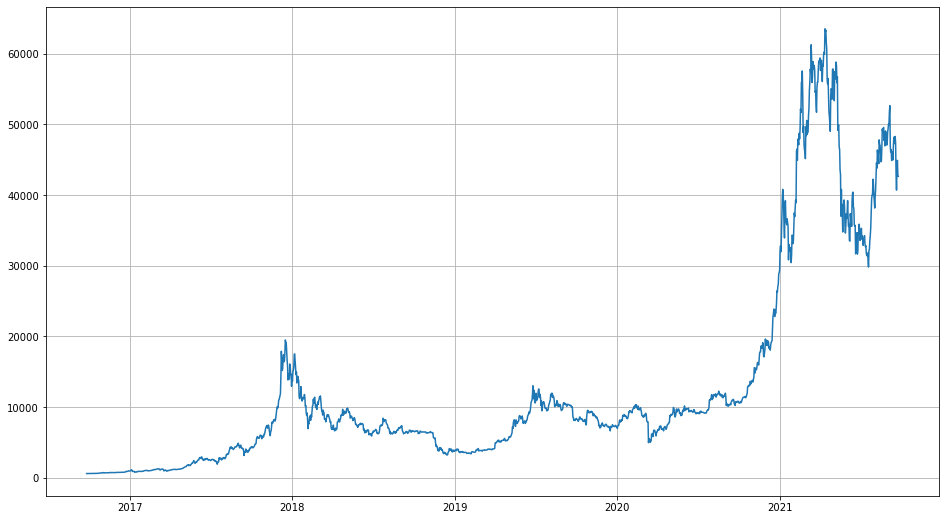

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'])
plt.grid(1)
plt.show()

In [6]:
df['r'] = df['Close'][1:].reset_index(drop=True) / df['Close'][:-1].reset_index(drop=True) - 1

In [7]:
df

,Date,Close,r
0,2016-09-25,600.825989,0.012012
1,2016-09-26,608.043030,-0.003087
2,2016-09-27,606.166016,-0.002372
3,2016-09-28,604.728027,0.001596
4,2016-09-29,605.692993,0.006673
...,...,...,...
1818,2021-09-21,40693.675781,0.070793
1819,2021-09-22,43574.507812,0.030306
1820,2021-09-23,44895.097656,-0.045781
1821,2021-09-24,42839.750000,-0.004755


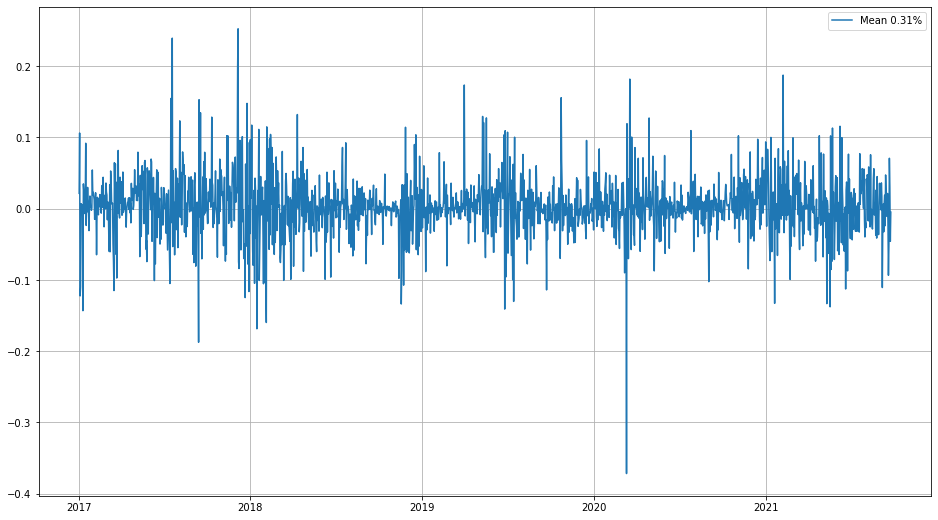

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['r'], label='Mean {:.2f}%'.format(df['r'].mean() * 100))
plt.grid(1)
plt.legend()
plt.show()

In [9]:
short = 5
long = 100
df['SMA'] = df['Close'].rolling(short).mean()
df['LMA'] = df['Close'].rolling(long).mean()

In [10]:
df = df.dropna()

In [11]:
df['strategy'] = 1 * (df['r'] * (df['SMA'] > df['LMA']) - df['r'] * (df['SMA'] < df['LMA']))

In [12]:
df

,Date,Close,r,SMA,LMA,strategy
99,2017-01-02,1021.750000,0.021620,983.710596,730.656891,0.021620
100,2017-01-03,1043.839966,0.106233,997.779187,735.087031,0.106233
101,2017-01-04,1154.729980,-0.122410,1036.477588,740.553900,-0.122410
102,2017-01-05,1013.380005,-0.109711,1046.404993,744.626040,-0.109711
103,2017-01-06,902.200989,0.007076,1027.180188,747.600770,0.007076
...,...,...,...,...,...,...
1817,2021-09-20,42843.800781,-0.050185,46686.652344,40760.223945,-0.050185
1818,2021-09-21,40693.675781,0.070793,45268.715625,40776.182109,0.070793
1819,2021-09-22,43574.507812,0.030306,44530.113281,40809.742422,0.030306
1820,2021-09-23,44895.097656,-0.045781,43853.460156,40854.630703,-0.045781


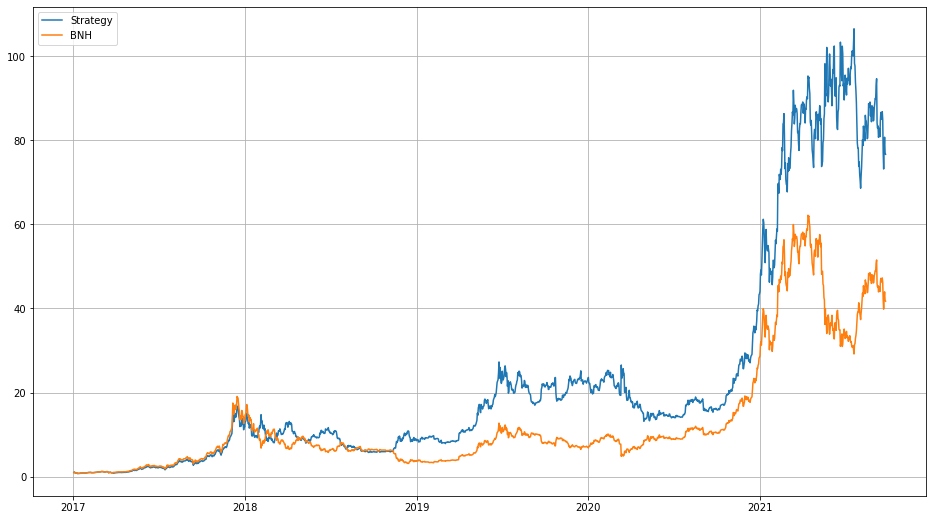

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], np.cumprod(1 + df['strategy']), label='Strategy')
plt.plot(df['Date'], np.cumprod(1 + df['r']), label='BNH')
plt.grid(1)
plt.legend()
plt.show()

In [14]:
r_strat = np.prod(1 + df['strategy']) ** (365 / len(df['strategy'])) - 1
r_bnh = np.prod(1 + df['r']) ** (365 / len(df['r'])) - 1
koef = 5
r_strat -= koef * (1 + df['strategy']).std() ** 2
r_bnh -= koef * (1 + df['r']).std() ** 2
print('Годовая доходность скользящих средних {:.2f}%'.format(r_strat * 100))
print('Годовая доходность покупки и держания {:.2f}%'.format(r_bnh * 100))

Годовая доходность скользящих средних 149.82%
Годовая доходность покупки и держания 119.53%


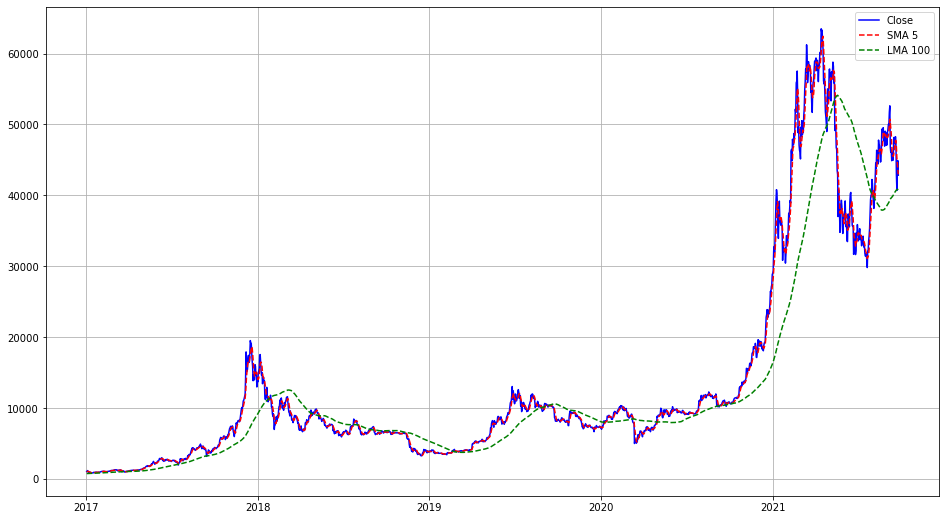

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'], 'b-', label='Close')
plt.plot(df['Date'], df['SMA'], 'r--', label='SMA '+str(short))
plt.plot(df['Date'], df['LMA'], 'g--', label='LMA '+str(long))
plt.grid(1)
plt.legend()
plt.show()